In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [38]:
company = pd.read_csv('Company_Data.csv')

In [39]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [40]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [48]:
result = []
for value in company["Sales"]:
    if value <= 8 :
        result.append("Bad")
    else :
        result.append("Good")
    
company["Sales"] = result
print(company)

    Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0    Good        138      73           11         276    120       Bad   42   
1    Good        111      48           16         260     83      Good   65   
2    Good        113      35           10         269     80    Medium   59   
3     Bad        117     100            4         466     97    Medium   55   
4     Bad        141      64            3         340    128       Bad   38   
..    ...        ...     ...          ...         ...    ...       ...  ...   
395  Good        138     108           17         203    128      Good   33   
396   Bad        139      23            3          37    120    Medium   55   
397   Bad        162      26           12         368    159    Medium   40   
398   Bad        100      79            7         284     95       Bad   50   
399  Good        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Y

In [52]:
company.Sales.value_counts()

Bad     236
Good    164
Name: Sales, dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
labelenc = LabelEncoder()

In [56]:
company['Sales']= labelenc.fit_transform(company['Sales']) 
company['US']= labelenc.fit_transform(company['US'])
company['ShelveLoc']= labelenc.fit_transform(company['ShelveLoc']) 
company['Urban']= labelenc.fit_transform(company['Urban']) 

In [57]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


In [59]:
x = company.iloc[:,1:]
y = company.iloc[:,0:1]

In [60]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [61]:
y

,Sales
0,1
1,1
2,1
3,0
4,0
...,...
395,1
396,0
397,0
398,0


In [62]:
company.Sales.nunique()

2

In [63]:
company["Sales"].value_counts()

0    236
1    164
Name: Sales, dtype: int64

In [64]:
colnames = list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [69]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
85,125,103,0,304,112,2,49,13,0,0
69,127,59,0,339,99,2,65,12,1,0
203,131,82,0,132,157,0,25,14,1,0
379,125,111,0,404,107,0,54,15,1,0
261,121,42,4,188,118,2,54,15,1,1
...,...,...,...,...,...,...,...,...,...,...
306,131,32,1,85,133,2,48,12,1,1
165,147,58,7,100,191,0,27,15,1,1
7,136,81,15,425,120,1,67,10,1,1
219,116,79,19,359,116,1,58,17,1,1


In [70]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
132,125,87,9,232,136,1,72,10,1,1
390,108,75,9,61,111,2,67,12,1,1
310,175,65,29,419,166,2,53,12,1,1
3,117,100,4,466,97,2,55,14,1,1
248,111,52,0,12,101,2,61,11,1,1
...,...,...,...,...,...,...,...,...,...,...
361,131,25,10,183,104,2,56,15,0,1
197,124,61,0,333,138,2,76,16,1,0
23,121,31,0,292,109,2,79,10,1,0
54,134,103,13,25,144,2,76,17,0,1


In [71]:
y_train

,Sales
85,1
69,0
203,0
379,0
261,0
...,...
306,0
165,0
7,1
219,1


In [72]:
y_test

,Sales
132,1
390,0
310,1
3,0
248,0
...,...
361,1
197,0
23,0
54,0


## Building Decision Tree Classifier using Entropy Criteria

In [73]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

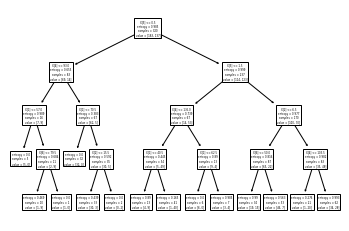

In [74]:
tree.plot_tree(model);

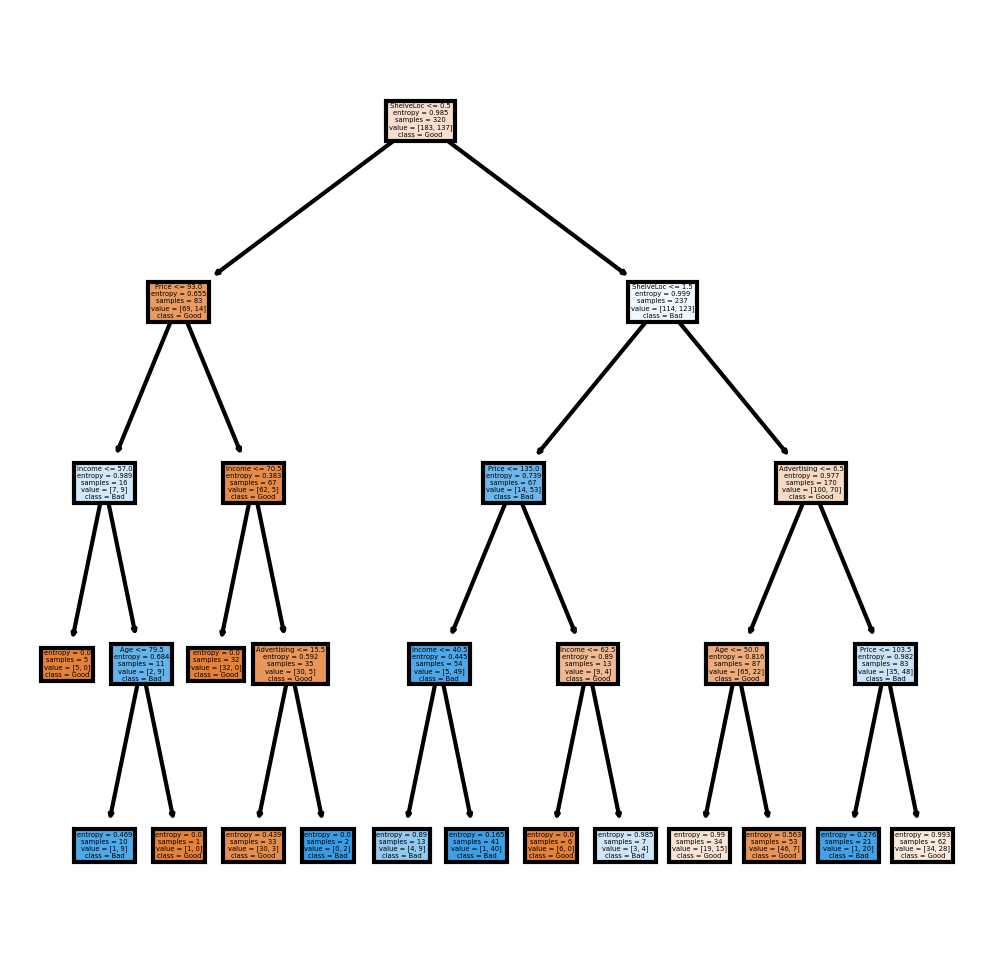

In [75]:
fn=[
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']
cn=['Good','Bad']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [76]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    58
1    22
dtype: int64

In [87]:
preds

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])